In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn import metrics
import seaborn as sns
import math 
from sklearn.metrics import classification_report

In [56]:
data = pd.read_csv('datos_limpios.csv') 

In [57]:
data_case = data.copy()

## Eleccion de la clasificacion

In [58]:
data_case['Above Average'] = data_case['Salary'] > 115000 
#data_case['Above Average'] = pd.get_dummies(data_case['Above Average'], drop_first= True)
data_case['Above Average'] = data_case['Above Average'].astype(int)
# Separamos los datos para elegir si estan por debajo o por encima del promedio
data_case


,Gender,Education Level,Years of Experience,Salary,Developer,Scientist,Engineer,Sales,Manager,Senior,HR,Coordinator,Project,Software,Junior,Analyst,Data,Operations,Above Average
0,1.0,1.0,5.0,90000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,0.0,2.0,3.0,65000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
2,1.0,3.0,15.0,150000.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,1.0,7.0,60000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.0,2.0,20.0,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,0.0,3.0,20.0,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6680,1.0,0.0,3.0,50000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6681,0.0,1.0,4.0,55000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6682,1.0,2.0,14.0,140000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


c:\Users\xavie\miniconda3\envs\datasc\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


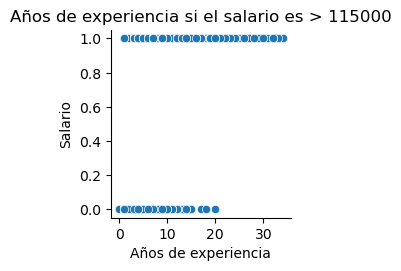

In [59]:
x = data_case['Years of Experience']
y = data_case['Above Average']
sns.pairplot(data_case,x_vars=['Years of Experience'],y_vars=['Above Average'],kind='scatter')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.title('Años de experiencia si el salario es > 115000')
plt.show()

En la siguiente celda se crea la funcion que entrena y da el resultado del dataset

In [60]:
def show_result(X_train, X_test, Y_train, Y_test):
    #Almacenamos el modelo en una variable
    model = LogisticRegression(max_iter = 1000)

    #Entrenamos los datos 
    model.fit(X_train, Y_train)

    #Prediccion
    Y_pred = model.predict(X_test)

    #Coeficientes
    print('beta_0:',model.intercept_)
    print('beta_1:',model.coef_)
    print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))

    # Matriz de confusion
    conf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap = 'Blues_r')
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

    #Caracteristicas de la matriz de confusion
    print (classification_report(Y_test, Y_pred))

## Regrsion logistica unidimensional

Dividimos el dataset

In [61]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)
x_train, x_test = np.array(x_train).reshape(-1, 1), np.array(x_test).reshape(-1, 1)
y_train, y_test = np.array(y_train).reshape(-1, 1), np.array(y_test).reshape(-1, 1)

c:\Users\xavie\miniconda3\envs\datasc\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


beta_0: [-4.06266913]
beta_1: [[0.56248715]]
Coefficient of determination: 0.43


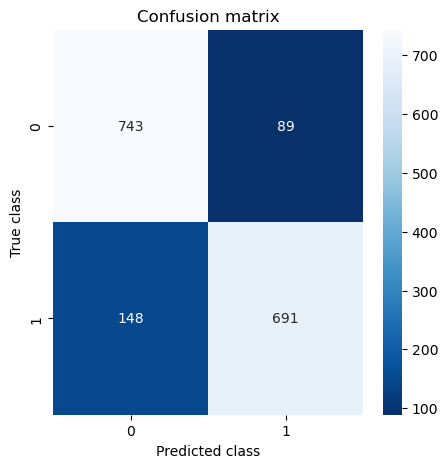

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       832
           1       0.89      0.82      0.85       839

    accuracy                           0.86      1671
   macro avg       0.86      0.86      0.86      1671
weighted avg       0.86      0.86      0.86      1671



In [62]:
show_result(x_train, x_test, y_train, y_test)

Graficamos la funcion sigmoide asociada junto con los datos 

c:\Users\xavie\miniconda3\envs\datasc\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xavie\AppData\Local\Temp\ipykernel_14824\616979756.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1/(1+math.exp(-exponent))


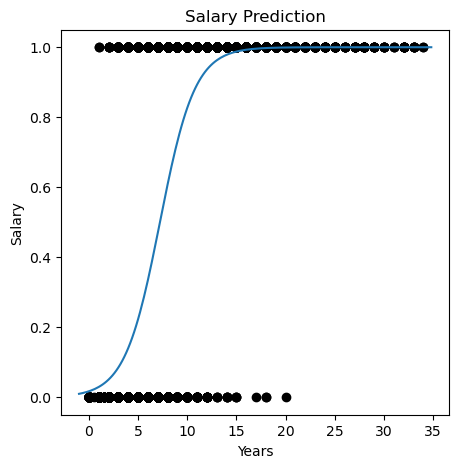

In [63]:
model = LogisticRegression()
model.fit(x_train, y_train)
def funct_exp(x):
    exponent = model.intercept_ + np.dot(model.coef_[0], x)
    return 1/(1+math.exp(-exponent))

x = np.arange(-1, 35., 0.2)
sig = [funct_exp(i) for i in x]


plt.figure(figsize=(5,5))
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.scatter(data_case['Years of Experience'], data_case['Above Average'], c='black')
plt.plot(x,sig)
plt.show()

## Regresion logistica multidimensional 

beta_0: [-6.84258268]
beta_1: [[ 0.69469413  0.04531803  0.75375018 -0.07527934  1.57581488  1.78318028
  -0.46255635  0.62359134 -2.14492963 -1.71259518 -0.90053721  1.00191878
   1.03244727 -2.12716574  0.05774945  2.94265453 -2.50163288]]
Coefficient of determination: 0.63


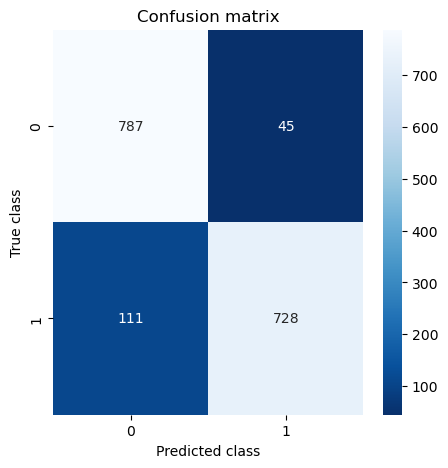

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       832
           1       0.94      0.87      0.90       839

    accuracy                           0.91      1671
   macro avg       0.91      0.91      0.91      1671
weighted avg       0.91      0.91      0.91      1671



In [64]:

x = data_case.drop(['Salary', 'Above Average'], axis=1)
y = data_case['Above Average']
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

show_result(x_train, x_test, y_train, y_test)
